In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# I kept reciving warnings when I executed seaborn codes. I upgraded all the libraries but still did not help.

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
!pip install --upgrade seaborn
!pip install --upgrade pandas

In [4]:
# Load the dataframe 
df = pd.read_csv('/Users/virensasalu/Documents/on this macbook/The University of Arizona/Course Work/Data Mining and Discovery/Assignments/week_1_assignment_output.csv')
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age categories
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior Citizen
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult


In [5]:
df.shape

(4478, 15)

### Question: 1 (2 Marks)

Display the count of missing values in each column of a dataset

In [6]:
MissingValueCount = df.isnull().sum()
print('The count of missing values in all columns are: ' ,'\n ', MissingValueCount)

The count of missing values in all columns are:  
  id                           0
name                         0
date                         0
manner_of_death              0
armed                      248
age                        169
gender                       5
race                       373
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       179
body_camera                  0
age categories               0
dtype: int64


### Question: 2 (2 Marks)
Display the outliers present in the age column using IQR method

In [7]:
Q1 = df['age'].quantile(0.25)
Q3 =  df['age'].quantile(0.75)

In [8]:
IQR = Q3 - Q1
IQR

18.0

In [9]:
UpperCase = Q3 + (1.5*IQR)
print(UpperCase)
LowerCase = Q1 - (1.5*IQR)
print(LowerCase)
print()
outliers = df[(df['age'] > UpperCase) | (df['age'] < LowerCase)  ]
print('The Outliers are :' ,'\n,', outliers)
print()
print('The Ages which are considered as outliers are','\n',outliers['age'] )

72.0
0.0

The Outliers are : 
,         id                  name        date   manner_of_death       armed  \
29      52      Talbot Schroeder  2015-01-14              shot       knife   
92     554           James Allen  2015-02-07              shot         gun   
127    255        Douglas Harris  2015-02-20              shot         gun   
275    357   Richard Dale Weaver  2015-04-12              shot     machete   
315    406         Albert Hanson  2015-04-26              shot         gun   
426    542     Raymond  Phillips  2015-06-11              shot         gun   
518    641      Charles Crandall  2015-07-14              shot         gun   
598    724  Robert Patrick Quinn  2015-08-09              shot  toy weapon   
664    797   Charles Robert Shaw  2015-09-01              shot         gun   
1220  1395   Ralph "Phil" Grenon  2016-03-21  shot and Tasered       knife   
1434  1621       Edward Acquisto  2016-06-13              shot         gun   
1634  1822        Darrel Hetrick

In [10]:
OutliersList = []
for index, row in df.iterrows():
    age = row['age']
    if (age < LowerCase) or (age > UpperCase):
        OutliersList.append(row)

In [11]:
for Formatedoutlier in OutliersList:
    print('The list of outliers are : ' , '\n'  ,Formatedoutlier)

The list of outliers are :  
 id                                       52
name                       Talbot Schroeder
date                             2015-01-14
manner_of_death                        shot
armed                                 knife
age                                    75.0
gender                                    M
race                                      W
city                             Old Bridge
state                                    NJ
signs_of_mental_illness               False
threat_level                         attack
flee                            Not fleeing
body_camera                           False
age categories               Senior Citizen
Name: 29, dtype: object
The list of outliers are :  
 id                                    554
name                          James Allen
date                           2015-02-07
manner_of_death                      shot
armed                                 gun
age                                  74.0
gend

### Question: 3 (2 Marks) 
Group the year, gender, age categories to check how many victims were harmed

In [12]:
df['year'] = pd.to_datetime(df['date']).dt.year

In [13]:
df.head(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age categories,year
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,Senior Citizen,2015
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,Adult,2015
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,Youth,2015
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,Youth,2015
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,Adult,2015


In [14]:
GroupedData = df.groupby(['year', 'gender', 'age categories'])['id'].count().reset_index()

#Created a seperate column for victim count

GroupedData.rename(columns={'id': 'victim_count'}, inplace=True)
print(GroupedData.head(10))

#using Pivot Table Technique. 

#pivot_table = df.pivot_table(index='gender', columns='age categories', values='year', aggfunc='sum')
#print(pivot_table.head(4))

   year gender  age categories  victim_count
0  2015      F           Adult            18
1  2015      F  Senior Citizen             6
2  2015      F         Teenage             5
3  2015      F           Youth            13
4  2015      M           Adult           309
5  2015      M           Child             1
6  2015      M  Senior Citizen           166
7  2015      M         Teenage            89
8  2015      M           Youth           387
9  2016      F           Adult            15


### Question: 4 (2 Marks )
Generate a bar plot using seaborn and understand the threat levels of different age categories

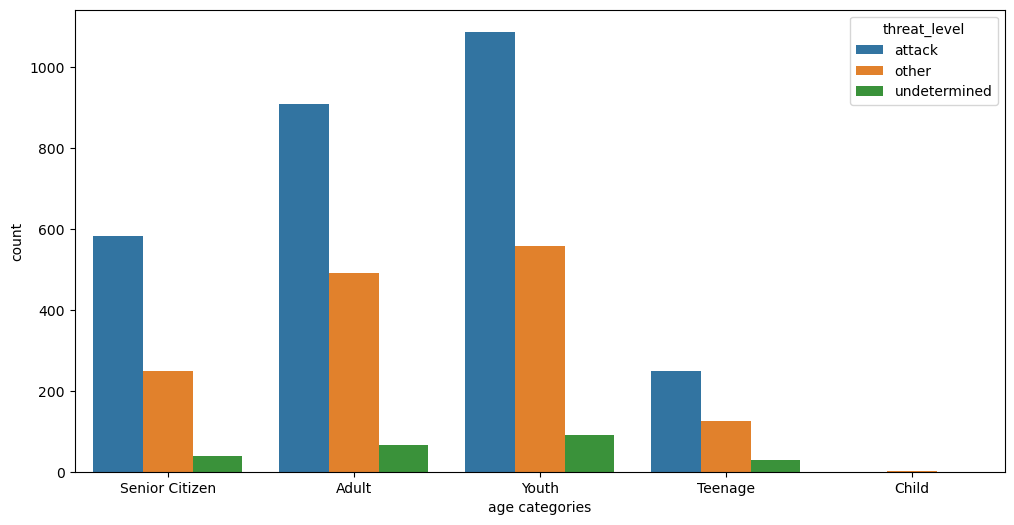

In [15]:
# used countplot as there were no numeric representation for 'x' and 'y' axis
plt.figure(figsize=(12, 6)) 
sns.countplot(data=df, x="age categories", hue="threat_level")
plt.show()

  Observations:
- From the representation, Youth have a higher chance of attack (Threat Level).
- As age progresses, chances of attack (Threat Level) reduce drastically.
- point to note is the there are a greater number of youth offenders than other age category which is representative of the data.
- Here child is considered as outliers as they represent first base of IQR and some Senior Citizens are consider as outliers.


### Question: 5 (2 Marks )
Generate a bar plot using seaborn and understand the year wise kills based on victim race

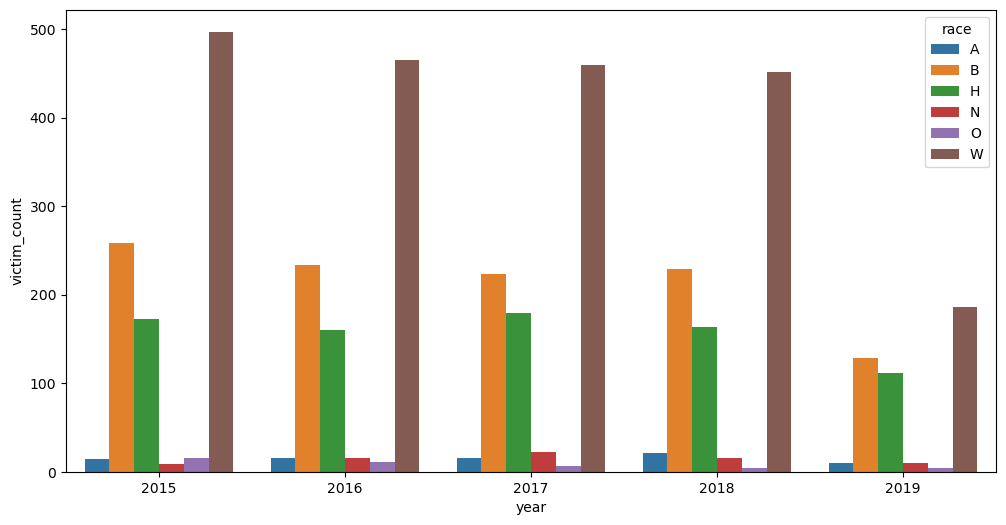

In [16]:
GroupedDF = df.groupby(['year', 'race']).size().reset_index(name='victim_count')
plt.figure(figsize=(12, 6))
sns.barplot(data=GroupedDF, x="year", y="victim_count", hue="race")
plt.show()

Observations:
- From the data representation, it is clear that the race; W have had the highest kill rates. But we have to account for the ratio of population in each state. Statically there more 'W' than another race. The assessment of this ratio should be evaluated with population of each race.
- It’s clear that each passing year, the number of kills have reduced for all races, although, 'A' has had consistent kill rates, it seems to have reduced in 2019.
- 'B' has the second biggest kill rates, if population index is considered then 'B' and 'H' could be highest killed race in USA.

    

In [17]:
# Save the data into csv to use for week-3 assignment
df.to_csv('Weekly_assignment_w2.csv', index=False)

## Thank you!